## **Deep Learning based Image classification Model Using Different optimizers**

1) SGD + Momentum 
2) Nesterov Accelerated Gradient Descent
3) RMSprop
4) Adam
5) Nadam

In [55]:
#Import packages
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD,RMSprop,Adam,Nadam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Training directory with Augmented Images

In [11]:
saree_path = '/content/drive/My Drive/Train_data/sarees'
jeans_path = '/content/drive/My Drive/Train_data/Men Jeans'
trouser_path = '/content/drive/My Drive/Train_data/Trousers'

print('Total training saree images:', len(os.listdir(saree_path)))
print('Total training Jeans images:', len(os.listdir(jeans_path)))
print('Total training Trouser images:', len(os.listdir(trouser_path)))

saree_name = [os.path.join(saree_path, f) for f in os.listdir(saree_path) if os.path.isfile(os.path.join(saree_path, f))]
Jeans_name = [os.path.join(jeans_path, f) for f in os.listdir(jeans_path) if os.path.isfile(os.path.join(jeans_path, f))]
Trouser_name = [os.path.join(trouser_path, f) for f in os.listdir(trouser_path) if os.path.isfile(os.path.join(trouser_path, f))]

Total training saree images: 701
Total training Jeans images: 701
Total training Trouser images: 694


In [49]:
batch_size = 25
TRAINING_DIR = "/content/drive/My Drive/Train_data/"

training_datagen = ImageDataGenerator(
    rescale = 1./255)

VALIDATION_DIR = "/content/drive/My Drive/Test_data/"

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='categorical')
  
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='categorical')


Found 2093 images belonging to 3 classes.
Found 75 images belonging to 3 classes.


In [18]:
print(train_generator.class_indices)

{'Men Jeans': 0, 'Trousers': 1, 'sarees': 2}


# CNN Model building

In [19]:
def cnnmodel():
  model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
    ])
  return model

In [22]:
model = cnnmodel()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

Callbacks Function

In [25]:
def callbacks():
    checkpoint = ModelCheckpoint('save.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
    earlystopping = EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience= 10,
                              verbose=1,
                              mode='max',
                              restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                             factor=0.2,
                             patience=10,
                             verbose=1,
                             mode='max',
                             min_delta=0.0001)

    callbacks = [checkpoint,earlystopping,reduce_lr]
    return callbacks

# SGD with Momentum

In [27]:
#instantiate callbacks
callbacks = callbacks()

SGDm = SGD(learning_rate=0.01, momentum=0.01,nesterov=False)


#instantiate model
model_SGDm = cnnmodel()

#Compile the model
model_SGDm.compile(optimizer=SGDm,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#Train the model
SGDm_mod = model_SGDm.fit_generator(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks =callbacks
)

Epoch 1/20
84/84 [==============================] - ETA: 0s - loss: 1.0563 - accuracy: 0.4816 
Epoch 00001: val_accuracy improved from -inf to 0.65333, saving model to save.h5
84/84 [==============================] - 1067s 13s/step - loss: 1.0563 - accuracy: 0.4816 - val_loss: 0.8998 - val_accuracy: 0.6533 - lr: 0.0100
Epoch 2/20
84/84 [==============================] - ETA: 0s - loss: 0.8071 - accuracy: 0.6101
Epoch 00002: val_accuracy did not improve from 0.65333
84/84 [==============================] - 8s 92ms/step - loss: 0.8071 - accuracy: 0.6101 - val_loss: 0.5996 - val_accuracy: 0.6533 - lr: 0.0100
Epoch 3/20
84/84 [==============================] - ETA: 0s - loss: 0.6184 - accuracy: 0.6679
Epoch 00003: val_accuracy did not improve from 0.65333
84/84 [==============================] - 8s 94ms/step - loss: 0.6184 - accuracy: 0.6679 - val_loss: 0.5222 - val_accuracy: 0.6533 - lr: 0.0100
Epoch 4/20
84/84 [==============================] - ETA: 0s - loss: 0.5528 - accuracy: 0.7081
E

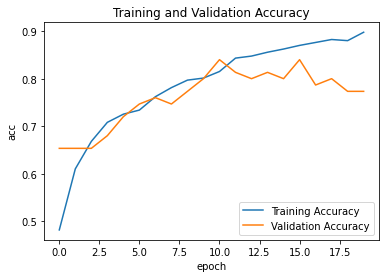

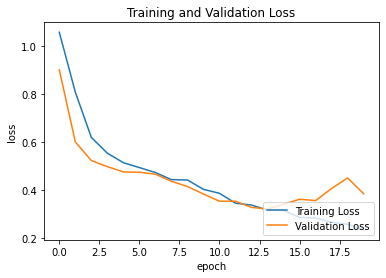

In [28]:
#Visualize training results
acc = plt.plot(SGDm_mod.history['accuracy'])
val_acc = plt.plot(SGDm_mod.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

loss= plt.plot(SGDm_mod.history['loss'])
val_loss=plt.plot(SGDm_mod.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

# Nesterov Accelerated Gradient Descent

In [30]:
NESTROV= SGD(learning_rate=0.01, momentum=0.01, nesterov= True)

#instantiate model
model_NESTROV = cnnmodel()


#Compile the model
model_NESTROV.compile(optimizer=NESTROV,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#Train the model
NESTROV_mod = model_NESTROV.fit_generator(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks =callbacks
)

Epoch 1/20
84/84 [==============================] - ETA: 0s - loss: 1.0420 - accuracy: 0.4730
Epoch 00001: val_accuracy did not improve from 0.84000
84/84 [==============================] - 8s 95ms/step - loss: 1.0420 - accuracy: 0.4730 - val_loss: 0.8134 - val_accuracy: 0.6267 - lr: 0.0100
Epoch 2/20
84/84 [==============================] - ETA: 0s - loss: 0.7560 - accuracy: 0.6264
Epoch 00002: val_accuracy did not improve from 0.84000
84/84 [==============================] - 8s 93ms/step - loss: 0.7560 - accuracy: 0.6264 - val_loss: 0.6115 - val_accuracy: 0.6133 - lr: 0.0100
Epoch 3/20
84/84 [==============================] - ETA: 0s - loss: 0.5974 - accuracy: 0.6818
Epoch 00003: val_accuracy did not improve from 0.84000
84/84 [==============================] - 8s 94ms/step - loss: 0.5974 - accuracy: 0.6818 - val_loss: 0.5519 - val_accuracy: 0.6800 - lr: 0.0100
Epoch 4/20
84/84 [==============================] - ETA: 0s - loss: 0.5428 - accuracy: 0.7114
Epoch 00004: val_accuracy did 

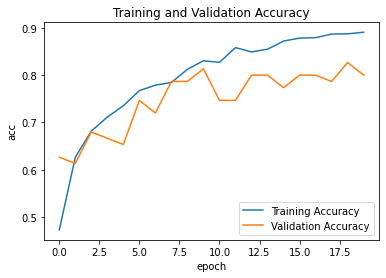

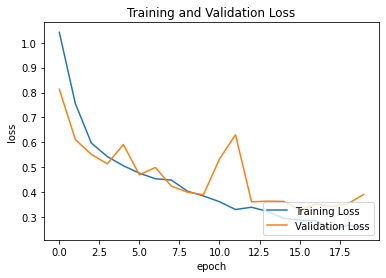

In [31]:
#Visualize training results
acc = plt.plot(NESTROV_mod.history['accuracy'])
val_acc = plt.plot(NESTROV_mod.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

loss= plt.plot(NESTROV_mod.history['loss'])
val_loss=plt.plot(NESTROV_mod.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

# RMSprop

In [32]:
RMS= RMSprop(learning_rate=0.01)

#instantiate model
model_RMS = cnnmodel()

#Compile the model
model_RMS.compile(optimizer=RMS,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#Train the model
RMS_mod = model_RMS.fit_generator(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks =callbacks
)

Epoch 1/20
84/84 [==============================] - ETA: 0s - loss: 80.4391 - accuracy: 0.3459
Epoch 00001: val_accuracy did not improve from 0.84000
84/84 [==============================] - 8s 99ms/step - loss: 80.4391 - accuracy: 0.3459 - val_loss: 1.1015 - val_accuracy: 0.3333 - lr: 0.0100
Epoch 2/20
84/84 [==============================] - ETA: 0s - loss: 1.1008 - accuracy: 0.3225
Epoch 00002: val_accuracy did not improve from 0.84000
84/84 [==============================] - 9s 103ms/step - loss: 1.1008 - accuracy: 0.3225 - val_loss: 1.0988 - val_accuracy: 0.3333 - lr: 0.0100
Epoch 3/20
84/84 [==============================] - ETA: 0s - loss: 1.1000 - accuracy: 0.3172
Epoch 00003: val_accuracy did not improve from 0.84000
84/84 [==============================] - 8s 93ms/step - loss: 1.1000 - accuracy: 0.3172 - val_loss: 1.0988 - val_accuracy: 0.3333 - lr: 0.0100
Epoch 4/20
84/84 [==============================] - ETA: 0s - loss: 1.0990 - accuracy: 0.3383
Epoch 00004: val_accuracy d

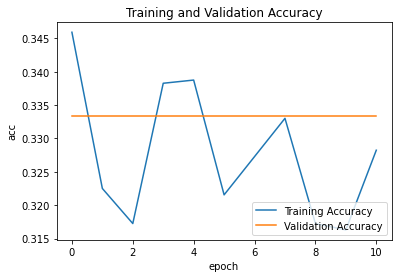

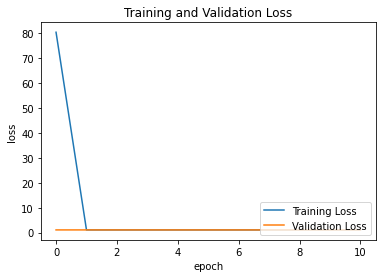

In [33]:
#Visualize training results
acc = plt.plot(RMS_mod.history['accuracy'])
val_acc = plt.plot(RMS_mod.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

loss= plt.plot(RMS_mod.history['loss'])
val_loss=plt.plot(RMS_mod.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

# #Reducing learning rate to 0.001

In [39]:
#Reducing learning rate to 0.001

RMS= RMSprop(learning_rate=0.001)

#instantiate model
model_RMS = cnnmodel()

#Compile the model
model_RMS.compile(optimizer=RMS,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#Train the model
RMS_mod = model_RMS.fit_generator(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks =callbacks
)


Epoch 1/20
84/84 [==============================] - ETA: 0s - loss: 0.9799 - accuracy: 0.5733
Epoch 00001: val_accuracy did not improve from 0.84000
84/84 [==============================] - 8s 96ms/step - loss: 0.9799 - accuracy: 0.5733 - val_loss: 0.6098 - val_accuracy: 0.6933 - lr: 0.0010
Epoch 2/20
84/84 [==============================] - ETA: 0s - loss: 0.5638 - accuracy: 0.7449
Epoch 00002: val_accuracy did not improve from 0.84000
84/84 [==============================] - 8s 95ms/step - loss: 0.5638 - accuracy: 0.7449 - val_loss: 0.4691 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 3/20
84/84 [==============================] - ETA: 0s - loss: 0.4345 - accuracy: 0.8294
Epoch 00003: val_accuracy did not improve from 0.84000
84/84 [==============================] - 8s 94ms/step - loss: 0.4345 - accuracy: 0.8294 - val_loss: 0.5026 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 4/20
84/84 [==============================] - ETA: 0s - loss: 0.3180 - accuracy: 0.8643
Epoch 00004: val_accuracy did 

By Reducing the Learning rate Val accuracy improved in this model

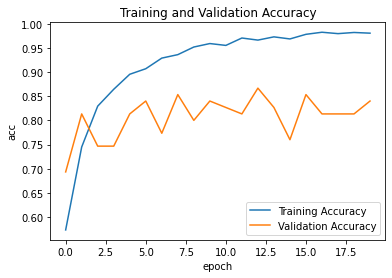

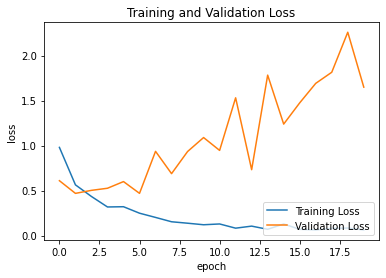

In [40]:
#Visualize training results
acc = plt.plot(RMS_mod.history['accuracy'])
val_acc = plt.plot(RMS_mod.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

loss= plt.plot(RMS_mod.history['loss'])
val_loss=plt.plot(RMS_mod.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

# Adam

In [34]:
ADAM = Adam(learning_rate=0.01)

#instantiate model
model_ADAM = cnnmodel()

#Compile the model
model_ADAM.compile(optimizer=ADAM,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#Train the model
ADAM_mod = model_ADAM.fit_generator(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks =callbacks
)

Epoch 1/20
84/84 [==============================] - ETA: 0s - loss: 5.5766 - accuracy: 0.4816
Epoch 00001: val_accuracy did not improve from 0.84000
84/84 [==============================] - 8s 95ms/step - loss: 5.5766 - accuracy: 0.4816 - val_loss: 0.7568 - val_accuracy: 0.5733 - lr: 0.0100
Epoch 2/20
84/84 [==============================] - ETA: 0s - loss: 0.7689 - accuracy: 0.5929
Epoch 00002: val_accuracy did not improve from 0.84000
84/84 [==============================] - 8s 93ms/step - loss: 0.7689 - accuracy: 0.5929 - val_loss: 0.6114 - val_accuracy: 0.6400 - lr: 0.0100
Epoch 3/20
84/84 [==============================] - ETA: 0s - loss: 0.6692 - accuracy: 0.6273
Epoch 00003: val_accuracy did not improve from 0.84000
84/84 [==============================] - 8s 91ms/step - loss: 0.6692 - accuracy: 0.6273 - val_loss: 0.5397 - val_accuracy: 0.6667 - lr: 0.0100
Epoch 4/20
84/84 [==============================] - ETA: 0s - loss: 0.6338 - accuracy: 0.6589
Epoch 00004: val_accuracy did 

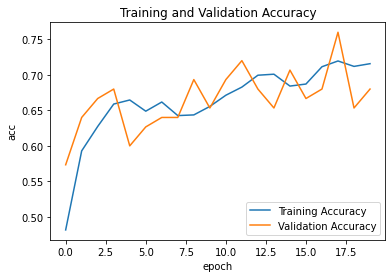

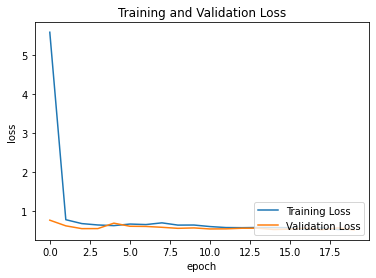

In [35]:
#Visualize training results
acc = plt.plot(ADAM_mod.history['accuracy'])
val_acc = plt.plot(ADAM_mod.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

loss= plt.plot(ADAM_mod.history['loss'])
val_loss=plt.plot(ADAM_mod.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

# Nadam

In [36]:
NADAM = Nadam(learning_rate=0.01)

#instantiate model
model_NADAM = cnnmodel()

#Compile the model
model_NADAM.compile(optimizer=NADAM,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#Train the model
NADAM_mod = model_NADAM.fit_generator(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks =callbacks
)

Epoch 1/20
84/84 [==============================] - ETA: 0s - loss: 4.3867 - accuracy: 0.3516
Epoch 00001: val_accuracy did not improve from 0.84000
84/84 [==============================] - 8s 96ms/step - loss: 4.3867 - accuracy: 0.3516 - val_loss: 1.0989 - val_accuracy: 0.3333 - lr: 0.0100
Epoch 2/20
84/84 [==============================] - ETA: 0s - loss: 1.0996 - accuracy: 0.3249
Epoch 00002: val_accuracy did not improve from 0.84000
84/84 [==============================] - 8s 94ms/step - loss: 1.0996 - accuracy: 0.3249 - val_loss: 1.0990 - val_accuracy: 0.3333 - lr: 0.0100
Epoch 3/20
84/84 [==============================] - ETA: 0s - loss: 1.0999 - accuracy: 0.3306
Epoch 00003: val_accuracy did not improve from 0.84000
84/84 [==============================] - 8s 94ms/step - loss: 1.0999 - accuracy: 0.3306 - val_loss: 1.0986 - val_accuracy: 0.3333 - lr: 0.0100
Epoch 4/20
84/84 [==============================] - ETA: 0s - loss: 1.0995 - accuracy: 0.3172
Epoch 00004: val_accuracy did 

# Reducing Learning rate to 0.001

In [44]:
NADAM = Nadam(learning_rate=0.001)

#instantiate model
model_NADAM = cnnmodel()

#Compile the model
model_NADAM.compile(optimizer=NADAM,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#Train the model
NADAM_mod = model_NADAM.fit_generator(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks =callbacks
)

Epoch 1/20
84/84 [==============================] - ETA: 0s - loss: 0.7888 - accuracy: 0.5948
Epoch 00001: val_accuracy did not improve from 0.86667
84/84 [==============================] - 8s 96ms/step - loss: 0.7888 - accuracy: 0.5948 - val_loss: 0.5050 - val_accuracy: 0.7867 - lr: 0.0010
Epoch 2/20
84/84 [==============================] - ETA: 0s - loss: 0.5448 - accuracy: 0.7181
Epoch 00002: val_accuracy did not improve from 0.86667
84/84 [==============================] - 8s 94ms/step - loss: 0.5448 - accuracy: 0.7181 - val_loss: 0.4875 - val_accuracy: 0.7733 - lr: 0.0010
Epoch 3/20
84/84 [==============================] - ETA: 0s - loss: 0.4281 - accuracy: 0.7759
Epoch 00003: val_accuracy did not improve from 0.86667
84/84 [==============================] - 8s 95ms/step - loss: 0.4281 - accuracy: 0.7759 - val_loss: 0.4937 - val_accuracy: 0.7733 - lr: 0.0010
Epoch 4/20
84/84 [==============================] - ETA: 0s - loss: 0.3024 - accuracy: 0.8619
Epoch 00004: val_accuracy did 

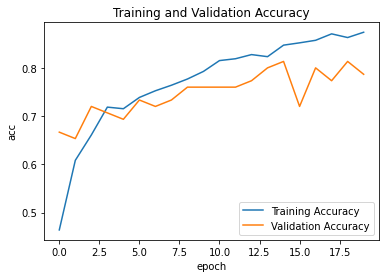

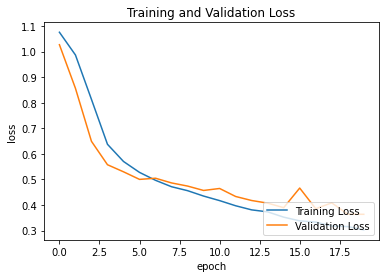

In [48]:
#Visualize training results
acc = plt.plot(NADAM_mod.history['accuracy'])
val_acc = plt.plot(NADAM_mod.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

loss= plt.plot(NADAM_mod.history['loss'])
val_loss=plt.plot(NADAM_mod.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

In [53]:
from os import listdir
from os.path import isfile, join
predict_dir_path='/content/drive/My Drive/Val/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['img_137.jpeg', 'img_136.jpeg', 'img_135.jpeg', 'img_107.jpeg', 'img_108.jpeg', 'img_106.jpeg', 'img_119.jpeg', 'img_118.jpeg', 'img_117.jpeg', 'img_126.jpeg', 'img_128.jpeg', 'img_124.jpeg', 'img_125.jpeg', 'img_127.jpeg', 'img_129.jpeg', 'images.jpg', 'images (1).jpg', 'download.jpg', 'images (2).jpg', 'download (1).jpg']


# Using NADAM model to predict

In [57]:
from keras.preprocessing import image

trousers_counter = 0 
jeans_counter  = 0
saree_counter = 0

for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model_NADAM.predict_classes(images, batch_size=10)

    #print(classes)
    
    if classes == 0:
      print(file + ": " + 'Jeans')
      jeans_counter += 1
    elif classes == 1:
      print(file + ": " + 'Trouser')
      trousers_counter += 1
    else:
      print(file + ": " + 'Saree')
      saree_counter += 1

print("Total Trousers :", trousers_counter)
print("Total Jeans :", jeans_counter)
print("Total sarees :", saree_counter) 

img_137.jpeg: Saree
img_136.jpeg: Saree
img_135.jpeg: Saree
img_107.jpeg: Trouser
img_108.jpeg: Trouser
img_106.jpeg: Trouser
img_119.jpeg: Jeans
img_118.jpeg: Trouser
img_117.jpeg: Jeans
img_126.jpeg: Jeans
img_128.jpeg: Jeans
img_124.jpeg: Jeans
img_125.jpeg: Jeans
img_127.jpeg: Trouser
img_129.jpeg: Trouser
images.jpg: Saree
images (1).jpg: Saree
download.jpg: Jeans
images (2).jpg: Jeans
download (1).jpg: Trouser
Total Trousers : 7
Total Jeans : 8
Total sarees : 5
